**Note**
This approach was developed by referencing from the source https://towardsdatascience.com/unsupervised-sentiment-analysis-a38bf1906483

Please note that some of the packages and functions specifically used for this project would only work when run from Google Colab. Hence, please run this file in Google Colab. Please update the locations of the files with respect to your Google Drive. I have commented on the lines where you need to update the locations



In [ ]:
# Copyright 2020 indicNLP library
# @misc{kunchukuttan2020indicnlp,
# author = "Anoop Kunchukuttan",
# title = "{The IndicNLP Library}",
# year = "2020",
# howpublished={\url{https://github.com/anoopkunchukuttan/indic_nlp_library/blob/master/docs/indicnlp.pdf}}
# }

In [ ]:
from google.colab import drive

**Installing unidecode and Importing packages**

In [1]:
!pip install Unidecode
!git clone https://github.com/anoopkunchukuttan/indic_nlp_library.git
!git clone https://github.com/anoopkunchukuttan/indic_nlp_resources.git
import re
import logging
import numpy as np
import pandas as pd
import multiprocessing
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from re import sub
from time import time 
from unidecode import unidecode
from gensim.models import Word2Vec
from collections import defaultdict
from gensim.models import KeyedVectors
from gensim.test.utils import get_tmpfile
from gensim.models.phrases import Phrases, Phraser
from sklearn.cluster import KMeans
import seaborn as sns
import collections
from collections import Counter
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import sys
INDIC_NLP_LIB_HOME=r"/content/indic_nlp_library"   # update the location
INDIC_NLP_RESOURCES=r"/content/indic_nlp_resources"    # update the location
sys.path.append(r'{}'.format(INDIC_NLP_LIB_HOME))

from indicnlp import common
common.set_resources_path(INDIC_NLP_RESOURCES)
from indicnlp import loader
loader.load()
from indicnlp.tokenize import indic_tokenize
from wordcloud import WordCloud
font = "gargi.ttf"     # update the location
import matplotlib.pyplot as plt

logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 5.3 MB/s 
Cloning into 'indic_nlp_library'...
remote: Enumerating objects: 1325, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 1325 (delta 91), reused 82 (delta 82), pack-reused 1218
Receiving objects: 100% (1325/1325), 9.55 MiB | 12.92 MiB/s, done.
Resolving deltas: 100% (701/701), done.
Cloning into 'indic_nlp_resources'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 139 (delta 2), reused 2 (delta 0), pack-reused 126
Receiving objects: 100% (139/139), 149.77 MiB | 28.50 MiB/s, done.
Resolving deltas: 100% (53/53), done.
Checking out files: 100% (28/28), done.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Reading the dataset**

In [2]:
file = pd.read_csv("/content/drive/MyDrive/Main Project/lyrics_1051_cleaned.csv", index_col=[0])  # update the location
file_cleaned = file.dropna()

**Removing stopwords and also converting the Hindi text to ASCII format**

In [3]:
stopwords_hindi = open('/content/drive/MyDrive/Main Project/final_stopwords.txt','r').read().splitlines()  # update the location
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stopwords_hindi])

In [4]:
def text_to_word_list(text, remove_hindi_letters):                          
    text = remove_hindi_letters(text)
    text = str(text)
    text = text.lower()
    text = text.split()
    return text  

In [5]:
file_cleaned['aft_stopwords_hin'] = file_cleaned.hin_cleaned.apply(lambda x: remove_stopwords(x))

In [6]:
file_cleaned.aft_stopwords_hin = file_cleaned.aft_stopwords_hin.apply(lambda x: text_to_word_list(x, unidecode))

In [7]:
pd.options.display.max_colwidth = 5000

In [45]:
file_model = file_cleaned.copy()
file_model = file_model[file_model.aft_stopwords_hin.str.len()>1]

**Creating bigrams from the lyrics using Phrases()**

In [46]:
sent = [row for row in file_model.aft_stopwords_hin]
phrases = Phrases(sent, min_count=1, progress_per=50000)
bigram = Phraser(phrases)
sentences = bigram[sent]
sentences[0]

['logo',
 'duniyaa',
 'hr_kdm',
 'insaa',
 'glt_shii',
 'smjh',
 'ke',
 'khu',
 'glt',
 'glt',
 'hu',
 'shii',
 'shii',
 'mrjii',
 'jiine',
 'sbko',
 'arjii',
 'duu',
 'mtlb',
 'sbkaa',
 'mujhpe',
 'mujhse',
 'hq',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'he',
 'gdaaro',
 'udhaaro',
 'mere',
 'jiine',
 'aadt',
 'ghott',
 'dm',
 'besliikaa',
 'glii',
 'naa',
 'jisme',
 'hyaa',
 'naa',
 'jisme',
 'shrm',
 'mn',
 'bole',
 'ke',
 'rs',
 'jiine',
 'hrjaanaa',
 'duniyaa',
 'dushmn',
 'sb_begaanaa',
 'aag',
 'lgaanaa',
 'mn',
 'bole',
 'mn',
 'bole',
 'mn',
 'jiinaa_mr',
 'jaanaa',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 'ethe_rkh',
 'sddaa_hq',
 '

**Training Word2Vec**

In [47]:
w2v_model = Word2Vec(min_count=3,
                     window=3,
                     size=300,
                     sample=1e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=multiprocessing.cpu_count()-1,
                     sg=1
) 

w2v_model.build_vocab(sentences, progress_per=50000)

In [48]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1)

w2v_model.init_sims(replace=True)

**Extracting the cleaned text and the manual sentiment for the section to compute the accuracy**

In [49]:
file_export = file_model.copy()
file_export['old'] = file_export.aft_stopwords_hin
file_export.old = file_export.old.str.join(' ')
file_export.aft_stopwords_hin = file_export.aft_stopwords_hin.apply(lambda x: ' '.join(bigram[x]))
file_export.polarity = file_export.polarity.astype('int8')

In [50]:
file_export[['aft_stopwords_hin', 'polarity']].to_csv('cleaned_dataset_new.csv', index=False)

**K-means Clustering**

In [51]:
word_vectors = w2v_model.wv

In [52]:
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [53]:
word_vectors.similar_by_vector(model.cluster_centers_[0], topn=20, restrict_vocab=None)

[('bethaashaa', 0.7004828453063965),
 ('zindgii_subh', 0.6987849473953247),
 ('pyaar_sh', 0.6964471340179443),
 ('paake_tujhe', 0.6940304636955261),
 ('jaaen_mr', 0.6937701106071472),
 ('nhiin_paataa', 0.6923778057098389),
 ('jiine_vjh', 0.6916659474372864),
 ('jaaoge_bdl', 0.68702632188797),
 ('subh_honge', 0.6867091059684753),
 ('sreraah_clte', 0.6831232309341431),
 ('jvaan_hsiin', 0.6805703639984131),
 ('guzaaraa_ai', 0.6796351671218872),
 ("j'indgii_cain", 0.6792693138122559),
 ("merii_aashik'ii", 0.678810179233551),
 ('kyuun_khhudaa', 0.6786684393882751),
 ('teraa_ghaattaa', 0.6777998208999634),
 ('sjaao_mujhe', 0.6769285798072815),
 ('ik_khaanii', 0.6768463850021362),
 ('maut_vo', 0.6766871213912964),
 ('zulfen_udddhaataa', 0.6749498248100281)]

In [54]:
# Assign positive cluster index based on which cluster will have more positive words in it.
positive_cluster_index = 1
positive_cluster_center = model.cluster_centers_[positive_cluster_index]
negative_cluster_center = model.cluster_centers_[1-positive_cluster_index]

In [55]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])
words['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
words['cluster_value'].value_counts()

 1    4500
-1    3275
Name: cluster_value, dtype: int64

**Writing the data and thereby creating sentiment dictionary**

In [57]:
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)

**tfidf weighting and prediction**

In [58]:
final_file = pd.read_csv('cleaned_dataset_new.csv')

In [59]:
sentiment_map = pd.read_csv('sentiment_dictionary.csv')

In [60]:
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

In [61]:
file_weighting = final_file.copy()

In [62]:
tfidf = TfidfVectorizer(tokenizer=lambda y: y.split(), norm=None)
tfidf.fit(file_weighting.aft_stopwords_hin)
features = pd.Series(tfidf.get_feature_names())
transformed = tfidf.transform(file_weighting.aft_stopwords_hin)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
def create_tfidf_dictionary(x, transformed_file, features):
    #create dictionary for each input sentence x, where each word has assigned its tfidf score
    vector_coo = transformed_file[x.name].tocoo()
    vector_coo.col = features.iloc[vector_coo.col].values
    dict_from_coo = dict(zip(vector_coo.col, vector_coo.data))
    return dict_from_coo

def replace_tfidf_words(x, transformed_file, features):
    #replacing each word with it's calculated tfidf dictionary with scores of each word
    dictionary = create_tfidf_dictionary(x, transformed_file, features)   
    return list(map(lambda y:dictionary[f'{y}'], x.aft_stopwords_hin.split()))

In [64]:
%%time
replaced_tfidf_scores = file_weighting.apply(lambda x: replace_tfidf_words(x, transformed, features), axis=1)#this step takes around 3-4 minutes minutes to calculate

CPU times: user 340 ms, sys: 7.34 ms, total: 347 ms
Wall time: 344 ms


In [66]:
def replace_sentiment_words(word, sentiment_dict):
    #replacing each word with its associated sentiment score from sentiment dict
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out

In [67]:
replaced_closeness_scores = file_weighting.aft_stopwords_hin.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

In [68]:
prediction_file = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, file_weighting.aft_stopwords_hin, file_weighting.polarity]).T
prediction_file.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence', 'sentiment']
prediction_file['sentiment_rate'] = prediction_file.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
prediction_file['prediction'] = (prediction_file.sentiment_rate>0).astype('int8')
prediction_file['sentiment'] = [1 if i==1 else 0 for i in prediction_file.sentiment]

**Metric scores**

In [69]:
predicted_classes = prediction_file.prediction
y_test = prediction_file.sentiment

conf_matrix = pd.DataFrame(confusion_matrix(prediction_file.sentiment, prediction_file.prediction))
print('Confusion Matrix')
display(conf_matrix)

test_scores = accuracy_score(y_test,predicted_classes), precision_score(y_test, predicted_classes), recall_score(y_test, predicted_classes), f1_score(y_test, predicted_classes)

print('\n \n Scores')
scores = pd.DataFrame(data=[test_scores])
scores.columns = ['accuracy', 'precision', 'recall', 'f1']
scores = scores.T
scores.columns = ['scores']
display(scores)

Confusion Matrix


,0,1
0,294,169
1,264,323



 
 Scores


,scores
accuracy,0.587619
precision,0.656504
recall,0.550256
f1,0.598703


**Confusion Matrix**

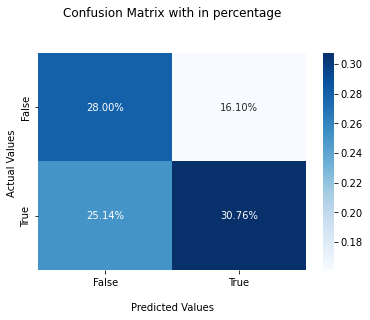

In [70]:
cf_matrix = confusion_matrix(prediction_file.sentiment, prediction_file.prediction)

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with in percentage\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

**WordCloud**

In [8]:
def count_length():
    file_cleaned['word_count'] = file_cleaned['hin_cleaned'].apply(lambda x: len(str(x).split(" ")))


In [9]:
count_length()
file_cleaned.tail()

,Title,lyrics,lyrics_eng,polarity,eng_cleaned,hin_cleaned,aft_stopwords_hin,word_count
1046,zindagi-hindi,"एक दिन मोहब्बत ओढ़ कर एक दिन गली मोड़ पर तेरी हथेली पर\xa0लिखूं मेरा नाम तेरे नाम पर फिट तू तक़ल्लुफ़ छोड़ कर फिर तू झुका कर के नज़र रखना मेरे काँधे पे सर ज़िन्दगी.. कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी.. तारों भरी एक रात में तेरे ख़त\xa0पढ़ेंगे साथ में कोर जो पन्ना रह गया एक कांपते से हाथ में थोड़ी शिक़ायत करना तू थोड़ी शिक़ायत मैं करूँ नाराज़ बस ना होना तू ज़िन्दगी.. कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी.. तू है तो मैं हूँ,\xa0तू है तो मैं हूँ तू है तो फ़लक, तू है तो ज़मीन ओ ..","One day, after wearing love, one day, on the street turn your palm, my name, my name is fit on your name and then you have to be tilted and keep an eye on my shoulder, my life on my shoulder .. Tell me something, tell life, life is life, life tells life, tell life, life is your address Life .. In one night filled with stars, you will bear your threats, along with the core, which is left, you have a little complaint in your hand with a trembling Know life .. You are, I am, you are, I am you, you are, you are, you are the land ..",-1,One day after wearing love one day on the street turn your palm my name my name is fit on your name and then you have to be tilted and keep an eye on my shoulder my life on my shoulder Tell me something tell life life is life life tells life tell life life is your address Life In one night filled with stars you will bear your threats along with the core which is left you have a little complaint in your hand with a trembling Know life You are I am you are I am you you are you are you are the land,एक दिन मोहब्बत ओढ़ कर एक दिन गली मोड़ पर तेरी हथेली परलिखूं मेरा नाम तेरे नाम पर फिट तू तक़ल्लुफ़ छोड़ कर फिर तू झुका कर के नज़र रखना मेरे काँधे पे सर ज़िन्दगी कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी तारों भरी एक रात में तेरे ख़तपढ़ेंगे साथ में कोर जो पन्ना रह गया एक कांपते से हाथ में थोड़ी शिक़ायत करना तू थोड़ी शिक़ायत मैं करूँ नाराज़ बस ना होना तू ज़िन्दगी कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी कुछ तो बता ज़िन्दगी अपना पता ज़िन्दगी तू है तो मैं हूँ तू है तो मैं हूँ तू है तो फ़लक तू है तो ज़मीन ओ,"[din, mohbbt, orh, din, glii, modddh, terii, hthelii, prlikhuun, naam, tere, naam, phitt, tuu, tqlluf, chodddh, tuu, jhukaa, ke, nzr, rkhnaa, mere, kaandhe, sr, zindgii, btaa, zindgii, ptaa, zindgii, btaa, zindgii, ptaa, zindgii, taaron, bhrii, raat, tere, khhtprhenge, kor, pnnaa, rh, kaanpte, haath, thodddhii, shiqaayt, tuu, thodddhii, shiqaayt, kruun, naaraaz, bs, naa, tuu, zindgii, btaa, zindgii, ptaa, zindgii, btaa, zindgii, ptaa, zindgii, tuu, tuu, tuu, flk, tuu, zmiin, o]",118
1047,zindagi-ka-safar,ज़िन्दगी का सफ़र है ये कैसा सफ़र कोई समझा नहीं कोई जाना नहीं ज़िन्दगी का सफ़र है ये कैसा सफ़र कोई समझा नहीं कोई जाना नहीं है ये कैसी डगर चलते हैं सब मगर कोई समझा नहीं कोई जाना नहीं ज़िन्दगी को बहुत प्यार हमने दिया मौत से भी मोहब्बत निभायेंगे हम रोते रोते ज़माने में आये मगर हँसते हँसते ज़माने से जायेंगे हम जायेंगे पर किधर है किसे ये खबर कोई समझा नहीं कोई जाना नहीं ऐसे जीवन भी हैं जो जिये ही नहीं जिनको जीने से पहले ही मौत आ गयी फूल ऐसे भी हैं जो खिले ही नहीं जिनको खिलने से पहले फिजां खा गयी है परेशां नज़र थक गये चार अगर कोई समझा नहीं कोई जाना नहीं ज़िन्दगी का सफ़र है ये कैसा सफ़र कोई समझा नहीं कोई जाना नहीं,"Life is a journey of life, no one can understand what no one knows is the journey of life. We will play, we will come in the weeping era, but we will go laughing and laugh, but where is this news, no one has no one know No, who have eaten the fan before blooming, the eyes are tired, four, if no one understands, no one is going to know how this journey is not understood, no one can know",-1,Life is a journey of life no one can understand what no one knows is the journey of life We will play we will come in the weeping era but we will go laughing and laugh but where is this news no one has no one know No who have eaten the fan before blooming the eyes are tired four if n

In [10]:
file_cleaned = file_cleaned.reset_index(drop = True)

In [11]:
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        tokens.append(t)
    return tokens
file_cleaned['hin_tokens'] = file_cleaned['hin_cleaned'].apply(lambda x: tokenization(x))

In [12]:
for i in range(len(file_cleaned)):
    file_cleaned['hin_tokens'][i]=[ele for ele in file_cleaned['hin_tokens'][i] if ele not in (stopwords_hindi)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
more_stopwords = ['तुम','मेरी','मुझे','क्योंकि','हम','प्रति','अबकी','आगे','माननीय','शहर','बताएं','कौनसी','क्लिक','किसकी','बड़े','मैं','and','रही','आज','लें','आपके','मिलकर','सब','मेरे','जी','श्री','वैसा','आपका','अंदर', 'अत', 'अपना', 'अपनी', 'अपने', 'अभी', 'आदि', 'आप', 'इत्यादि', 'इन', 'इनका', 'इन्हीं', 'इन्हें', 'इन्हों', 'इस', 'इसका', 'इसकी', 'इसके', 'इसमें', 'इसी', 'इसे', 'उन', 'उनका', 'उनकी', 'उनके', 'उनको', 'उन्हीं', 'उन्हें', 'उन्हों', 'उस', 'उसके', 'उसी', 'उसे', 'एक', 'एवं', 'एस', 'ऐसे', 'और', 'कई', 'कर','करता', 'करते', 'करना', 'करने', 'करें', 'कहते', 'कहा', 'का', 'काफ़ी', 'कि', 'कितना', 'किन्हें', 'किन्हों', 'किया', 'किर', 'किस', 'किसी', 'किसे', 'की', 'कुछ', 'कुल', 'के', 'को', 'कोई', 'कौन', 'कौनसा', 'गया', 'घर', 'जब', 'जहाँ', 'जा', 'जितना', 'जिन', 'जिन्हें', 'जिन्हों', 'जिस', 'जिसे', 'जीधर', 'जैसा', 'जैसे', 'जो', 'तक', 'तब', 'तरह', 'तिन', 'तिन्हें', 'तिन्हों', 'तिस', 'तिसे', 'तो', 'था', 'थी', 'थे', 'दबारा', 'दिया', 'दुसरा', 'दूसरे', 'दो', 'द्वारा', 'न', 'नहीं', 'ना', 'निहायत', 'नीचे', 'ने', 'पर', 'पर', 'पहले', 'पूरा', 'पे', 'फिर', 'बनी', 'बही', 'बहुत', 'बाद', 'बाला', 'बिलकुल', 'भी', 'भीतर', 'मगर', 'मानो', 'मे', 'में', 'यदि', 'यह', 'यहाँ', 'यही', 'या', 'यिह', 'ये', 'रखें', 'रहा', 'रहे', 'ऱ्वासा', 'लिए', 'लिये', 'लेकिन', 'व', 'वर्ग', 'वह', 'वह', 'वहाँ', 'वहीं', 'वाले', 'वुह', 'वे', 'वग़ैरह', 'संग', 'सकता', 'सकते', 'सबसे', 'सभी', 'साथ', 'साबुत', 'साभ', 'सारा', 'से', 'सो', 'ही', 'हुआ', 'हुई', 'हुए', 'है', 'हैं', 'हो', 'होता', 'होती', 'होते', 'होना', 'होने', 'अपनि', 'जेसे', 'होति', 'सभि', 'तिंहों', 'इंहों', 'दवारा', 'इसि', 'किंहें', 'थि', 'उंहों', 'ओर', 'जिंहें', 'वहिं', 'अभि', 'बनि', 'हि', 'उंहिं', 'उंहें', 'हें', 'वगेरह', 'एसे', 'रवासा', 'कोन', 'निचे', 'काफि', 'उसि', 'पुरा', 'भितर', 'हे', 'बहि', 'वहां', 'कोइ', 'यहां', 'जिंहों', 'तिंहें', 'किसि', 'कइ', 'यहि', 'इंहिं', 'जिधर', 'इंहें', 'अदि', 'इतयादि', 'हुइ', 'कोनसा', 'इसकि', 'दुसरे', 'जहां', 'अप', 'किंहों', 'उनकि', 'भि', 'वरग', 'हुअ', 'जेसा', 'नहिं']
for i in range(len(file_cleaned)):
    file_cleaned['hin_tokens'][i]=[ele for ele in file_cleaned['hin_tokens'][i] if ele not in (more_stopwords)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
corpus_list =[]
for i in range(len(file_cleaned)):
    corpus_list +=file_cleaned['hin_tokens'][i]
counter=collections.Counter(corpus_list)
print(counter)

Counter({'तू': 2868, 'दिल': 2255, 'तेरे': 1726, 'तेरी': 1395, 'ओ': 1383, 'रे': 1265, 'तेरा': 1145, 'दे': 1130, 'प्यार': 931, 'ले': 876, 'वो': 832, 'आ': 806, 'हाँ': 522, 'हर': 478, 'क्यूँ': 461, 'तुझे': 435, 'रंग': 426, 'ऐ': 415, 'दी': 407, 'ला': 392, 'सी': 382, 'सा': 374, 'बस': 364, 'पल': 354, 'मन': 339, 'रात': 338, 'जाना': 334, 'दिन': 333, 'हाय': 332, 'जान': 330, 'जाए': 328, 'दुनिया': 324, 'आँखों': 323, 'मैंने': 321, 'इक': 308, 'जय': 295, 'आजा': 288, 'लगा': 283, 'कहीं': 277, 'आया': 271, 'नि': 266, 'बात': 265, 'यार': 265, 'देखो': 259, 'बेबी': 259, 'तुझको': 255, 'चल': 247, 'आये': 242, 'आई': 240, 'सारी': 232, 'बन': 229, 'पास': 222, 'नैना': 220, 'माँ': 219, 'चाहे': 218, 'ते': 217, 'करे': 216, 'अरे': 214, 'सनम': 213, 'बिना': 212, 'गली': 210, 'नाम': 208, 'मिल': 207, 'यूँ': 204, 'पिया': 201, 'बिन': 200, 'इश्क': 199, 'दा': 198, 'देख': 194, 'ओह': 191, 'लगे': 187, 'मोहब्बत': 187, 'तूने': 186, 'मिला': 186, 'हम्म': 185, 'बार': 177, 'सुन': 176, 'जाये': 175, 'हाथ': 174, 'पीछे': 172, 'कह': 170, 'करू

In [15]:
to_remove = ['नेहरू', 'लेते', 'कटाक्ष', 'जय', 'शी', 'अगर', 'मास्टर', 'वो', 'सिगरेट', 'बीवी', 'इश्क़', 'किताब', 'वश', 'पटाकर', 'पिलाकर', 'तू', 'तेरे', 'तेरी', 'ओ', 'रे', 'तेरा', 'वो', 'आ', 'हाँ', 'तुझे', 'ऐ', 'सी', 'सा', 'नि', 'ते', 'यूँ', 'दा', 'रा', '।', '॥', 'नु', 'ए', ]
for i in range(len(file_cleaned)):
    file_cleaned['hin_tokens'][i]=[ele for ele in file_cleaned['hin_tokens'][i] if ele not in (to_remove)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
least_common= [word for word, word_count in Counter(corpus_list).most_common()[:-10:-1]]
for i in range(len(file_cleaned)):
    file_cleaned['hin_tokens'][i]=[ele for ele in file_cleaned['hin_tokens'][i] if ele not in (least_common)]
count_length()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa47df0a410>,
      dtype=object)

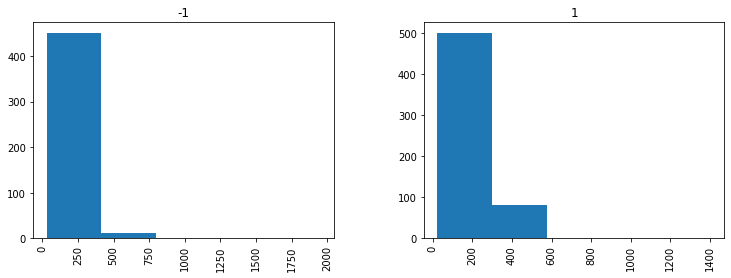

In [17]:
file_cleaned.hist(column = 'word_count', by ='polarity',figsize=(12,4), bins = 5)

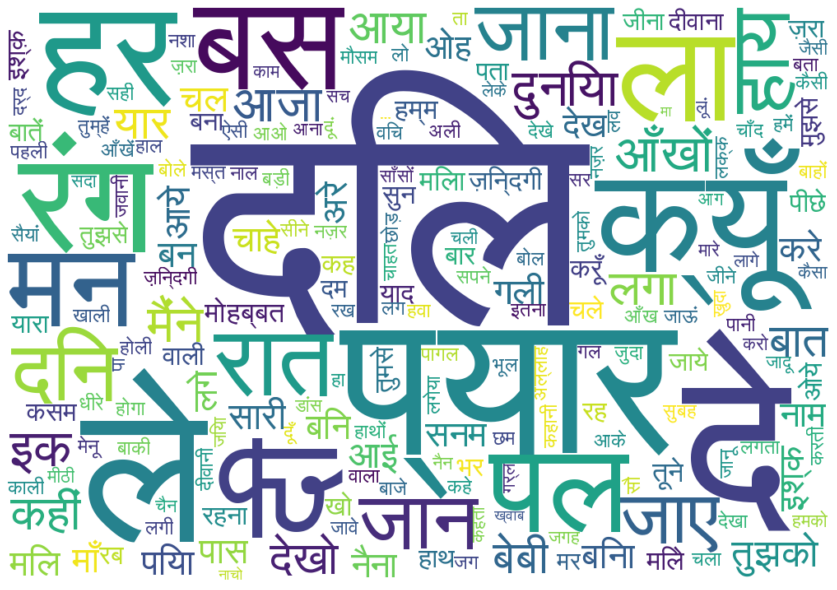

In [19]:
df_list = []
for i in range(len(file_cleaned)):
    df_list +=file_cleaned['hin_tokens'][i]
dictionary=Counter(df_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10, font_path= font).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

**WordCloud for English lyrics**

In [ ]:
file_cleaned['eng_tokens'] = file_cleaned['eng_cleaned'].apply(lambda x: x.lower())
file_cleaned['eng_tokens'] = file_cleaned['eng_tokens'].apply(word_tokenize)
text = " ".join(review for review in file_cleaned.eng_tokens.astype(str))
stopwords_eng = stopwords.words('english')

In [ ]:
  for i in range(len(file_cleaned)):
    file_cleaned['eng_tokens'][i]=[ele for ele in file_cleaned['eng_tokens'][i] if ele not in (stopwords_eng)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
corpus_list_eng =[]
for i in range(len(file_cleaned)):
    corpus_list_eng +=file_cleaned['eng_tokens'][i]
counter=collections.Counter(corpus_list_eng)
print(counter)

Counter({'heart': 1452, 'hai': 1364, 'love': 1294, 'come': 826, 'like': 802, 'tu': 670, 'eyes': 613, 'la': 604, 'go': 598, 'ho': 584, 'na': 559, 'life': 558, 'know': 407, 'one': 405, 'say': 400, 'dil': 384, 'ki': 378, 'world': 365, 'yes': 357, 'every': 353, 'get': 344, 'also': 325, 'ko': 322, 'take': 315, 'de': 311, 'see': 291, 'di': 288, 'tera': 280, 'baby': 273, 'tere': 271, 'night': 260, 'live': 259, 'want': 252, 'become': 250, 'little': 250, 'aa': 250, 'much': 242, 'teri': 237, 'without': 236, 'give': 233, 'today': 229, 'hi': 226, 'moment': 225, 'got': 222, 'mera': 219, 'listen': 216, 'let': 214, 'away': 213, 'tell': 210, 'make': 205, 'naina': 205, 'oh': 204, 'day': 203, 'even': 200, 'someone': 199, 'ai': 198, 'said': 197, 'main': 195, 'way': 195, 'jai': 194, 'lost': 193, 'us': 190, 'dreams': 189, 'came': 189, 'crazy': 187, 'koi': 187, 'look': 186, 'time': 184, 'kya': 183, 'ali': 180, 'two': 179, 'color': 176, 'piya': 174, 'ja': 172, 'kar': 168, 'mind': 167, 'first': 165, 'r': 165,

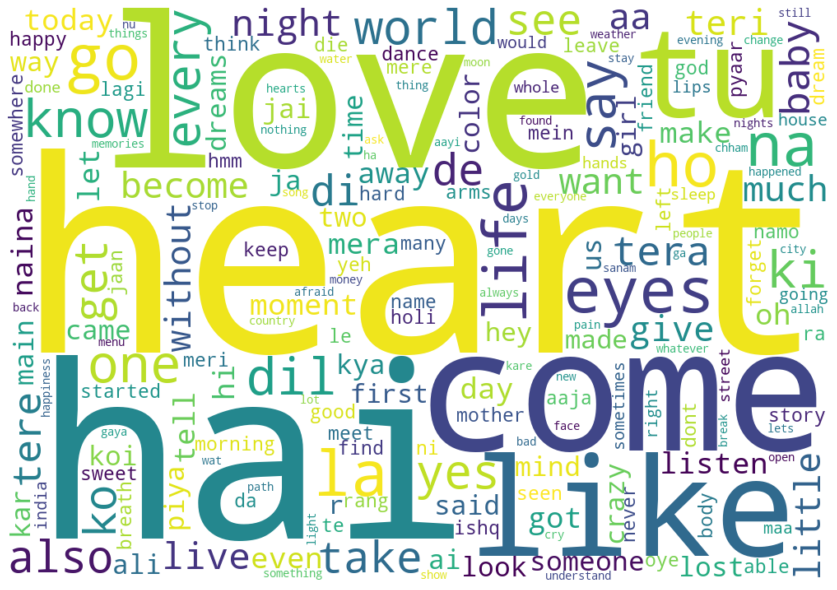

In [ ]:
data_list = []
for i in range(len(file_cleaned)):
    data_list +=file_cleaned['eng_tokens'][i]
dictionary=Counter(data_list)
wordcloud = WordCloud(width = 1000, height = 700,
                background_color ='white',
                min_font_size = 10).generate_from_frequencies(dictionary)
# plot the WordCloud image                      
plt.figure(figsize = (18, 8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()